<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#분석" data-toc-modified-id="분석-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>분석</a></span><ul class="toc-item"><li><span><a href="#반기-분류" data-toc-modified-id="반기-분류-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>반기 분류</a></span></li><li><span><a href="#반기별-방문등급" data-toc-modified-id="반기별-방문등급-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>반기별 방문등급</a></span></li><li><span><a href="#방문지수" data-toc-modified-id="방문지수-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>방문지수</a></span></li></ul></li><li><span><a href="#혼자-찌끄린거" data-toc-modified-id="혼자-찌끄린거-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>혼자 찌끄린거</a></span><ul class="toc-item"><li><span><a href="#반기,-TYPE별-구매금액,-등급" data-toc-modified-id="반기,-TYPE별-구매금액,-등급-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>반기, TYPE별 구매금액, 등급</a></span><ul class="toc-item"><li><span><a href="#반기별-고객별-선매품-구매-등급" data-toc-modified-id="반기별-고객별-선매품-구매-등급-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>반기별 고객별 선매품 구매 등급</a></span></li><li><span><a href="#반기별-고객별-전문품-구매-등급" data-toc-modified-id="반기별-고객별-전문품-구매-등급-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>반기별 고객별 전문품 구매 등급</a></span></li><li><span><a href="#반기별-고객별-편의품-구매-등급" data-toc-modified-id="반기별-고객별-편의품-구매-등급-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>반기별 고객별 편의품 구매 등급</a></span></li></ul></li></ul></li></ul></div>

In [1]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import pickle

import warnings
warnings.filterwarnings('ignore')


rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기 

In [2]:
# 경쟁사이용
competitor = pd.read_csv('../../data/경쟁사이용.txt', encoding='cp949')

# 고객DEMO
pp_demo = pd.read_pickle("../../DATA_preprocessed/pp_demo.pickle")

# 멤버심 여부
member = pd.read_csv('../../data/멤버십여부.txt', encoding='cp949')

# 채널이용
channel = pd.read_csv('../../data/채널이용.txt', encoding='cp949')

# 상금 거래 관련
pp_purprd_prodcl = pd.read_pickle('../../DATA_preprocessed/pp_purprd_prodcl.pickle')


## 분석

### 반기 분류

In [3]:
def find_season(df):
    if (df['구매_연']==2014)&(df['구매_월']<7):
        return '2014_1'
    elif (df['구매_연']==2014)&(df['구매_월']>=7):
        return '2014_2'
    elif (df['구매_연']==2015)&(df['구매_월']<7):
        return '2015_1'
    else:
        return '2015_2'

In [4]:
# 반기로 데이터 짜르기
cond_2014_1 =(pp_purprd_prodcl['구매_연']==2014)&(pp_purprd_prodcl['구매_월']<7)
cond_2014_2 =(pp_purprd_prodcl['구매_연']==2014)&(pp_purprd_prodcl['구매_월']>=7)
cond_2015_1 =(pp_purprd_prodcl['구매_연']==2015)&(pp_purprd_prodcl['구매_월']<7)
cond_2015_2 =(pp_purprd_prodcl['구매_연']==2015)&(pp_purprd_prodcl['구매_월']>=7)

pp_purprd_prodcl['반기']=0

pp_purprd_prodcl.loc[cond_2014_1,'반기']='2014_1'
pp_purprd_prodcl.loc[cond_2014_2,'반기']='2014_2'
pp_purprd_prodcl.loc[cond_2015_1,'반기']='2015_1'
pp_purprd_prodcl.loc[cond_2015_2,'반기']='2015_2'

In [5]:
pp_pv = pp_purprd_prodcl.pivot_table(index=['고객번호','TYPE'],columns='반기',values='구매금액',aggfunc=(np.mean,'count'),fill_value=0)
pp_pv=pp_pv.reset_index()
pp_pv

고객번호 TYPE  count                                mean                 \
반기                2014_1 2014_2 2015_1 2015_2         2014_1         2014_2   
0          1  선매품     45     44     50     47  193173.111111  369333.863636   
1          1  전문품      2      3      3      2  446025.000000  114533.333333   
2          1  편의품    191    309    259    102   54138.821990   56705.572816   
3          2  선매품     34     25     31     28  197656.470588  194082.400000   
4          2  전문품      5      3      9      1  287848.000000  355516.666667   
...      ...  ...    ...    ...    ...    ...            ...            ...   
49908  19381  편의품      0      0    365    432       0.000000       0.000000   
49909  19382  선매품      0      0      5      0       0.000000       0.000000   
49910  19382  편의품      0      0    393    508       0.000000       0.000000   
49911  19383  선매품      0      0      0     12       0.000000       0.000000   
49912  19383  편의품      0      0      5    243       0.000000       0.000000   

                                     
반기            2015_1         2015_2  
0      175986.400000  191122.127660  
1      318900.000000  277450.000000  
2       31437.625483   34949.784314  
3      178942.258065  266596.071429  
4      588998.888889   78000.000000  
...              ...            ...  
49908    6664.304110    7436.337963  
49909   31360.000000       0.000000  
49910    4249.208651    5068.964567  
49911       0.000000   75633.333333  
49912    5400.000000    5966.255144  

[49913 rows x 10 columns]

### 반기별 방문등급

In [ ]:
# 방문 - 변동지수 만들기
pp_pv = pp_purprd_prodcl.pivot_table(index=['고객번호','제휴사'],columns='반기',values='구매금액',aggfunc=('count'),fill_value=0)
# pp_pv=pp_pv.reset_index()

pp_pv['방문_변동지수'] = ((pp_pv['2014_2']-pp_pv['2014_1']) + (pp_pv['2015_1']-pp_pv['2014_2'])*1.5\
                    + (pp_pv['2015_2']-pp_pv['2015_1'])*2)/(np.mean(pp_pv['2014_1']+pp_pv['2014_2']+pp_pv['2015_1']+pp_pv['2015_2']))
pp_pv_=pp_pv['방문_변동지수'].unstack().reset_index()

In [14]:
pp_pv

반기         2014_1  2014_2  2015_1  2015_2   방문_변동지수
고객번호  제휴사                                          
1     A       230     274     243     127 -0.481938
      B         1      41      12      10 -0.015414
      C         7      41      57      14 -0.057545
2     A       338     264     238     240 -0.224014
      B         1       7       8       0 -0.017469
...           ...     ...     ...     ...       ...
19382 C         0       0       0       3  0.012331
19383 A         0       0       0      18  0.073986
      B         0       0       0      16  0.065765
      C         0       0       0       3  0.012331
      D         0       0       5     218  0.890916

[58443 rows x 5 columns]

In [ ]:
# 방문 변동지수 인원 배분 10 20 40 20 10 퍼센트로 등급 나누기
visit_lev = {}
# visist_lev_list=[]
for i in ['A','B','C','D']:
    instance = pp_demo_map[i]
    # print('ok')
    instance = instance.dropna()
    # print('ok_2')
    visit_lev_list=[]
    for j in [15,35,65,85]:
        visit_lev_list.append(np.percentile(instance,j))
    visit_lev[i] = visit_lev_list

visit_lev

In [ ]:
def make_visit_lev(x,y):
    if x > visit_lev[y][3]:
        return 5
    elif x > visit_lev[y][2]:
        return 4
    elif x > visit_lev[y][1]:
        return 3
    elif x > visit_lev[y][0]:
        return 2
    else:
        return 1

    
pp_demo_map['방문등급_A'] = pp_demo_map.apply(lambda row: make_visit_lev(row['A'],'A'),axis=1)
pp_demo_map['방문등급_B'] = pp_demo_map.apply(lambda row: make_visit_lev(row['B'],'B'),axis=1)
pp_demo_map['방문등급_C'] = pp_demo_map.apply(lambda row: make_visit_lev(row['C'],'C'),axis=1)
pp_demo_map['방문등급_D'] = pp_demo_map.apply(lambda row: make_visit_lev(row['D'],'D'),axis=1)
pp_demo_map

In [ ]:
pp_demo_map['최종방문점수'] = pp_demo_map.iloc[:,-4:].sum(axis=1)
pp_demo_map

### 방문지수

In [34]:
# 방문 - 변동지수 만들기
pp_pv = pp_purprd_prodcl.pivot_table(index=['고객번호','제휴사'],columns='반기',values='구매금액',aggfunc=('count'),fill_value=0)
# pp_pv=pp_pv.reset_index()

pp_pv['방문_변동지수'] = ((pp_pv['2014_2']-pp_pv['2014_1']) + (pp_pv['2015_1']-pp_pv['2014_2'])*1.5\
                    + (pp_pv['2015_2']-pp_pv['2015_1'])*2)/(np.mean(pp_pv['2014_1']+pp_pv['2014_2']+pp_pv['2015_1']+pp_pv['2015_2']))
pp_pv_=pp_pv['방문_변동지수'].unstack().reset_index()
pp_demo_map = pd.merge(pp_demo,pp_pv_,on='고객번호')
pp_demo_map

,고객번호,성별,연령대,거주지역,A,B,C,D
0,1,M,60세이상,서울특별시 강남구,-0.481938,-0.015414,-0.057545,NaN
1,2,M,60세이상,경기도,-0.224014,-0.017469,NaN,0.005138
2,3,M,60세이상,서울특별시 은평구,-0.002055,-0.002055,-0.385345,NaN
3,4,F,60세이상,서울특별시 노원구,-0.071931,0.024662,-0.029800,NaN
4,5,M,60세이상,경기도,-0.675124,-0.002055,NaN,0.008221
...,...,...,...,...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구,0.043159,0.021579,-0.022607,0.565172
19379,19380,F,20세~24세,서울특별시 마포구,0.012331,0.018497,0.172634,0.988537
19380,19381,F,40세~44세,부산광역시,0.010276,1.365661,0.036993,NaN
19381,19382,F,45세~49세,부산광역시,-0.004110,1.670854,0.012331,NaN


In [7]:
# 방문 변동지수 인원 배분 10 20 40 20 10 퍼센트로 등급 나누기
visit_lev = {}
# visist_lev_list=[]
for i in ['A','B','C','D']:
    instance = pp_demo_map[i]
    # print('ok')
    instance = instance.dropna()
    # print('ok_2')
    visit_lev_list=[]
    for j in [15,35,65,85]:
        visit_lev_list.append(np.percentile(instance,j))
    visit_lev[i] = visit_lev_list

visit_lev

{'A': [-0.10481370538593765,
  -0.009248268122288617,
  0.012331024163051488,
  0.10070336399825383],
 'B': [-0.18188260640500947,
  -0.021579292285340106,
  0.049324096652205954,
  0.2938894092193938],
 'C': [-0.10584129073285861,
  -0.012331024163051488,
  0.008220682775367659,
  0.12844816836511969],
 'D': [-0.0041103413876838295,
  -0.0010275853469209574,
  0.008220682775367659,
  0.022606877632261064]}

In [8]:
def make_visit_lev(x,y):
    if x > visit_lev[y][3]:
        return 5
    elif x > visit_lev[y][2]:
        return 4
    elif x > visit_lev[y][1]:
        return 3
    elif x > visit_lev[y][0]:
        return 2
    else:
        return 1

    
pp_demo_map['방문등급_A'] = pp_demo_map.apply(lambda row: make_visit_lev(row['A'],'A'),axis=1)
pp_demo_map['방문등급_B'] = pp_demo_map.apply(lambda row: make_visit_lev(row['B'],'B'),axis=1)
pp_demo_map['방문등급_C'] = pp_demo_map.apply(lambda row: make_visit_lev(row['C'],'C'),axis=1)
pp_demo_map['방문등급_D'] = pp_demo_map.apply(lambda row: make_visit_lev(row['D'],'D'),axis=1)
pp_demo_map

,고객번호,성별,연령대,거주지역,A,B,C,D,방문등급_A,방문등급_B,방문등급_C,방문등급_D
0,1,M,60세이상,서울특별시 강남구,-0.481938,-0.015414,-0.057545,NaN,1,3,2,1
1,2,M,60세이상,경기도,-0.224014,-0.017469,NaN,0.005138,1,3,1,3
2,3,M,60세이상,서울특별시 은평구,-0.002055,-0.002055,-0.385345,NaN,3,3,1,1
3,4,F,60세이상,서울특별시 노원구,-0.071931,0.024662,-0.029800,NaN,2,3,2,1
4,5,M,60세이상,경기도,-0.675124,-0.002055,NaN,0.008221,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구,0.043159,0.021579,-0.022607,0.565172,4,3,2,5
19379,19380,F,20세~24세,서울특별시 마포구,0.012331,0.018497,0.172634,0.988537,3,3,5,5
19380,19381,F,40세~44세,부산광역시,0.010276,1.365661,0.036993,NaN,3,5,4,1
19381,19382,F,45세~49세,부산광역시,-0.004110,1.670854,0.012331,NaN,3,5,4,1


In [9]:
pp_demo_map['최종방문점수'] = pp_demo_map.iloc[:,-4:].sum(axis=1)
pp_demo_map

,고객번호,성별,연령대,거주지역,A,B,C,D,방문등급_A,방문등급_B,방문등급_C,방문등급_D,최종방문점수
0,1,M,60세이상,서울특별시 강남구,-0.481938,-0.015414,-0.057545,NaN,1,3,2,1,7
1,2,M,60세이상,경기도,-0.224014,-0.017469,NaN,0.005138,1,3,1,3,8
2,3,M,60세이상,서울특별시 은평구,-0.002055,-0.002055,-0.385345,NaN,3,3,1,1,8
3,4,F,60세이상,서울특별시 노원구,-0.071931,0.024662,-0.029800,NaN,2,3,2,1,8
4,5,M,60세이상,경기도,-0.675124,-0.002055,NaN,0.008221,1,3,1,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구,0.043159,0.021579,-0.022607,0.565172,4,3,2,5,14
19379,19380,F,20세~24세,서울특별시 마포구,0.012331,0.018497,0.172634,0.988537,3,3,5,5,16
19380,19381,F,40세~44세,부산광역시,0.010276,1.365661,0.036993,NaN,3,5,4,1,13
19381,19382,F,45세~49세,부산광역시,-0.004110,1.670854,0.012331,NaN,3,5,4,1,13


<AxesSubplot:xlabel='최종방문점수', ylabel='Density'>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


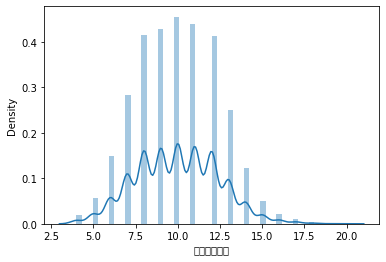

In [10]:
sns.distplot(pp_demo_map['최종방문점수'])

## 혼자 찌끄린거

### 반기, TYPE별 구매금액, 등급

In [19]:
p1 = pp_purprd_prodcl[(pp_purprd_prodcl.구매_연==2014)&(pp_purprd_prodcl.구매_월<7)]
p2 = pp_purprd_prodcl[(pp_purprd_prodcl.구매_연==2014)&(pp_purprd_prodcl.구매_월>=7)]

p3 = pp_purprd_prodcl[(pp_purprd_prodcl.구매_연==2015)&(pp_purprd_prodcl.구매_월<7)]
p4 = pp_purprd_prodcl[(pp_purprd_prodcl.구매_연==2015)&(pp_purprd_prodcl.구매_월>=7)]


# pp_purprd_prodcl['반기']=0

# pp_purprd_prodcl.loc[p1,'반기']='2014_1'
# pp_purprd_prodcl.loc[p2,'반기']='2014_2'
# pp_purprd_prodcl.loc[p3,'반기']='2015_1'
# pp_purprd_prodcl.loc[p4,'반기']='2015_2'


In [24]:
pp_type = pp_purprd_prodcl.pivot_table(index=['고객번호','TYPE'], columns='반기' , values='구매금액', aggfunc=['sum'])
pp_type

sum                                  
반기              2014_1      2014_2     2015_1     2015_2
고객번호  TYPE                                              
1     선매품    8692790.0  16250690.0  8799320.0  8982740.0
      전문품     892050.0    343600.0   956700.0   554900.0
      편의품   10340515.0  17522022.0  8142345.0  3564878.0
2     선매품    6720320.0   4852060.0  5547210.0  7464690.0
      전문품    1439240.0   1066550.0  5300990.0    78000.0
...                ...         ...        ...        ...
19381 편의품          NaN         NaN  2432471.0  3212498.0
19382 선매품          NaN         NaN   156800.0        NaN
      편의품          NaN         NaN  1669939.0  2575034.0
19383 선매품          NaN         NaN        NaN   907600.0
      편의품          NaN         NaN    27000.0  1449800.0

[49913 rows x 4 columns]

 #### 반기별 고객별 선매품 구매 등급

In [29]:
pp_type = pp_type.reset_index()
pp_type[pp_type['TYPE']=='선매품']['sum']['2014_1'].describe()

count    1.838500e+04
mean     2.328170e+06
std      3.910024e+06
min      9.800000e+02
25%      1.765000e+05
50%      6.933300e+05
75%      2.718570e+06
max      9.133260e+07
Name: 2014_1, dtype: float64

<AxesSubplot:xlabel='2014_1', ylabel='Count'>

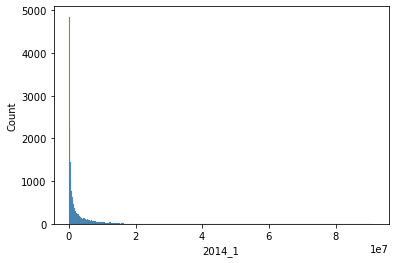

In [31]:
sns.histplot(pp_type[pp_type['TYPE']=='선매품']['sum']['2014_1'], )

####  반기별 고객별 전문품 구매 등급

#### 반기별 고객별 편의품 구매 등급

In [12]:
competitor

,고객번호,제휴사,경쟁사,이용년월
0,2,D,D02,201507
1,51,D,D01,201504
2,77,D,D02,201503
3,77,D,D02,201506
4,77,D,D02,201507
...,...,...,...,...
28154,19375,B,B01,201501
28155,19375,B,B01,201507
28156,19375,C,C03,201511
28157,19376,B,B01,201506


In [ ]:
# 방문 변동지수 인원 배분 10 20 40 20 10 퍼센트로 등급 나누기
visit_lev = {}
# visist_lev_list=[]
for i in ['A','B','C','D']:
    visist_lev_list=[]
    for j in [10,30,70,90]:
        visist_lev_list.append(np.percentile(pp_demo_map[i],j))
    visit_lev[i] = visist_lev_list

visist_lev

In [ ]:
# 방문 - 변동지수 만들기
pp_pv_ = pp_purprd_prodcl.pivot_table(index=['고객번호','제휴사'],columns='반기',values='구매금액',aggfunc=('count'),fill_value=0)
# pp_pv=pp_pv.reset_index()

pp_pv_['방문_변동지수'] = ((pp_pv['2014_2']-pp_pv['2014_1']) + (pp_pv['2015_1']-pp_pv['2014_2'])*1.5\
                    + (pp_pv['2015_2']-pp_pv['2015_1'])*2)/(np.mean(pp_pv['2014_1']+pp_pv['2014_2']+pp_pv['2015_1']+pp_pv['2015_2']))
pp_pv_=pp_pv['방문_변동지수'].unstack().reset_index()
pp_demo_map = pd.merge(pp_demo,pp_pv_,on='고객번호')
pp_demo_map

In [29]:
pp_pv = pp_purprd_prodcl.pivot_table(index=['고객번호','대분류명'],columns='분기',values='구매금액',aggfunc=(np.mean,'count'),fill_value=0)
pp_pv=pp_pv.reset_index()
pp_pv

고객번호      대분류명  count                                            \
분기                      2014_1 2014_2 2014_3 2014_4 2015_1 2015_2 2015_3   
0           1      기타상품      4      1      4      5      1      2      7   
1           1    디지털/가전      0      0      1      9      1      0      2   
2           1        식품     73     67     83    135    113    102     35   
3           1        의류      7      7      8      7      6      4      1   
4           1      일상용품     21     12     28     40     22     10      0   
...       ...       ...    ...    ...    ...    ...    ...    ...    ...   
141335  19383        식품      0      0      0      0      0      3     69   
141336  19383        의류      0      0      0      0      0      0      1   
141337  19383      일상용품      0      0      0      0      0      2     48   
141338  19383  전문스포츠/레저      0      0      0      0      0      0      1   
141339  19383      패션잡화      0      0      0      0      0      0      7   

                        mean                                             \
분기     2015_4         2014_1         2014_2        2014_3        2014_4   
0           2  177975.000000   66500.000000  115850.00000  9.584000e+04   
1           0       0.000000       0.000000    9900.00000  1.005800e+06   
2          47   24476.986301   44510.223881   14250.60241  1.447253e+04   
3           1  237540.000000  202992.857143  312712.50000  2.198557e+05   
4          10   91714.761905   53197.500000  123362.50000  1.504498e+05   
...       ...            ...            ...           ...           ...   
141335     56       0.000000       0.000000       0.00000  0.000000e+00   
141336      0       0.000000       0.000000       0.00000  0.000000e+00   
141337     69       0.000000       0.000000       0.00000  0.000000e+00   
141338      1       0.000000       0.000000       0.00000  0.000000e+00   
141339      3       0.000000       0.000000       0.00000  0.000000e+00   

                                                                    
분기             2015_1         2015_2         2015_3         2015_4  
0       133240.000000  267120.000000  142971.428571  191615.000000  
1       291000.000000       0.000000  900000.000000       0.000000  
2        15467.654867   11313.137255   17973.428571   12222.723404  
3       198736.666667  469887.500000  476900.000000   57000.000000  
4        43691.363636   73990.000000       0.000000   92031.000000  
...               ...            ...            ...            ...  
141335       0.000000    1333.333333    2408.260870    2535.535714  
141336       0.000000       0.000000   70400.000000       0.000000  
141337       0.000000   11500.000000    7535.208333   10283.333333  
141338       0.000000       0.000000   39000.000000   69300.000000  
141339       0.000000       0.000000   65014.285714  114733.333333  

[141340 rows x 18 columns]

In [36]:
pp_pv_cus = pp_purprd_prodcl.pivot_table(index=['고객번호','제휴사'],columns='분기',values='구매금액',aggfunc=(np.mean,'count'),fill_value=0)
pp_pv_cus = pp_pv_cus.reset_index()
pp_pv_cus

고객번호 제휴사  count                                                   \
분기               2014_1 2014_2 2014_3 2014_4 2015_1 2015_2 2015_3 2015_4   
0          1   A    120    110    129    145    138    105     66     61   
1          1   B      1      0      3     38     11      1      6      4   
2          1   C      0      7     10     31     23     34      1     13   
3          2   A    183    155    139    125    140     98    121    119   
4          2   B      1      0      0      7      5      3      0      0   
...      ...  ..    ...    ...    ...    ...    ...    ...    ...    ...   
58438  19382   C      0      0      0      0      0      0      0      3   
58439  19383   A      0      0      0      0      0      0     11      7   
58440  19383   B      0      0      0      0      0      0     16      0   
58441  19383   C      0      0      0      0      0      0      3      0   
58442  19383   D      0      0      0      0      0      5     96    122   

               mean                                              \
분기           2014_1        2014_2         2014_3         2014_4   
0      75998.250000  96212.909091   83117.519380  155987.172414   
1      21800.000000      0.000000    1566.666667    9774.736842   
2          0.000000  28620.714286    5469.000000   11134.903226   
3      77010.765027  65804.903226  106771.079137   56275.760000   
4      30500.000000      0.000000       0.000000    6635.714286   
...             ...           ...            ...            ...   
58438      0.000000      0.000000       0.000000       0.000000   
58439      0.000000      0.000000       0.000000       0.000000   
58440      0.000000      0.000000       0.000000       0.000000   
58441      0.000000      0.000000       0.000000       0.000000   
58442      0.000000      0.000000       0.000000       0.000000   

                                                                  
분기            2015_1        2015_2         2015_3         2015_4  
0       65268.623188  79768.380952  116558.939394   83737.704918  
1       17239.636364  18500.000000   18583.333333   18350.000000  
2        4620.826087   5917.647059    2190.000000    8810.615385  
3      131333.428571  92856.836735  114038.016529  100850.588235  
4       18960.000000  12566.666667       0.000000       0.000000  
...              ...           ...            ...            ...  
58438       0.000000      0.000000       0.000000    2663.333333  
58439       0.000000      0.000000   54045.454545   72900.000000  
58440       0.000000      0.000000    3037.500000       0.000000  
58441       0.000000      0.000000    2863.333333       0.000000  
58442       0.000000   5400.000000    4590.312500    6186.393443  

[58443 rows x 18 columns]

In [13]:
2015 구매감소 고객(등급이 낮아진?)의 경쟁사 이용 

SyntaxError: invalid syntax (727934018.py, line 1)